# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [67]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


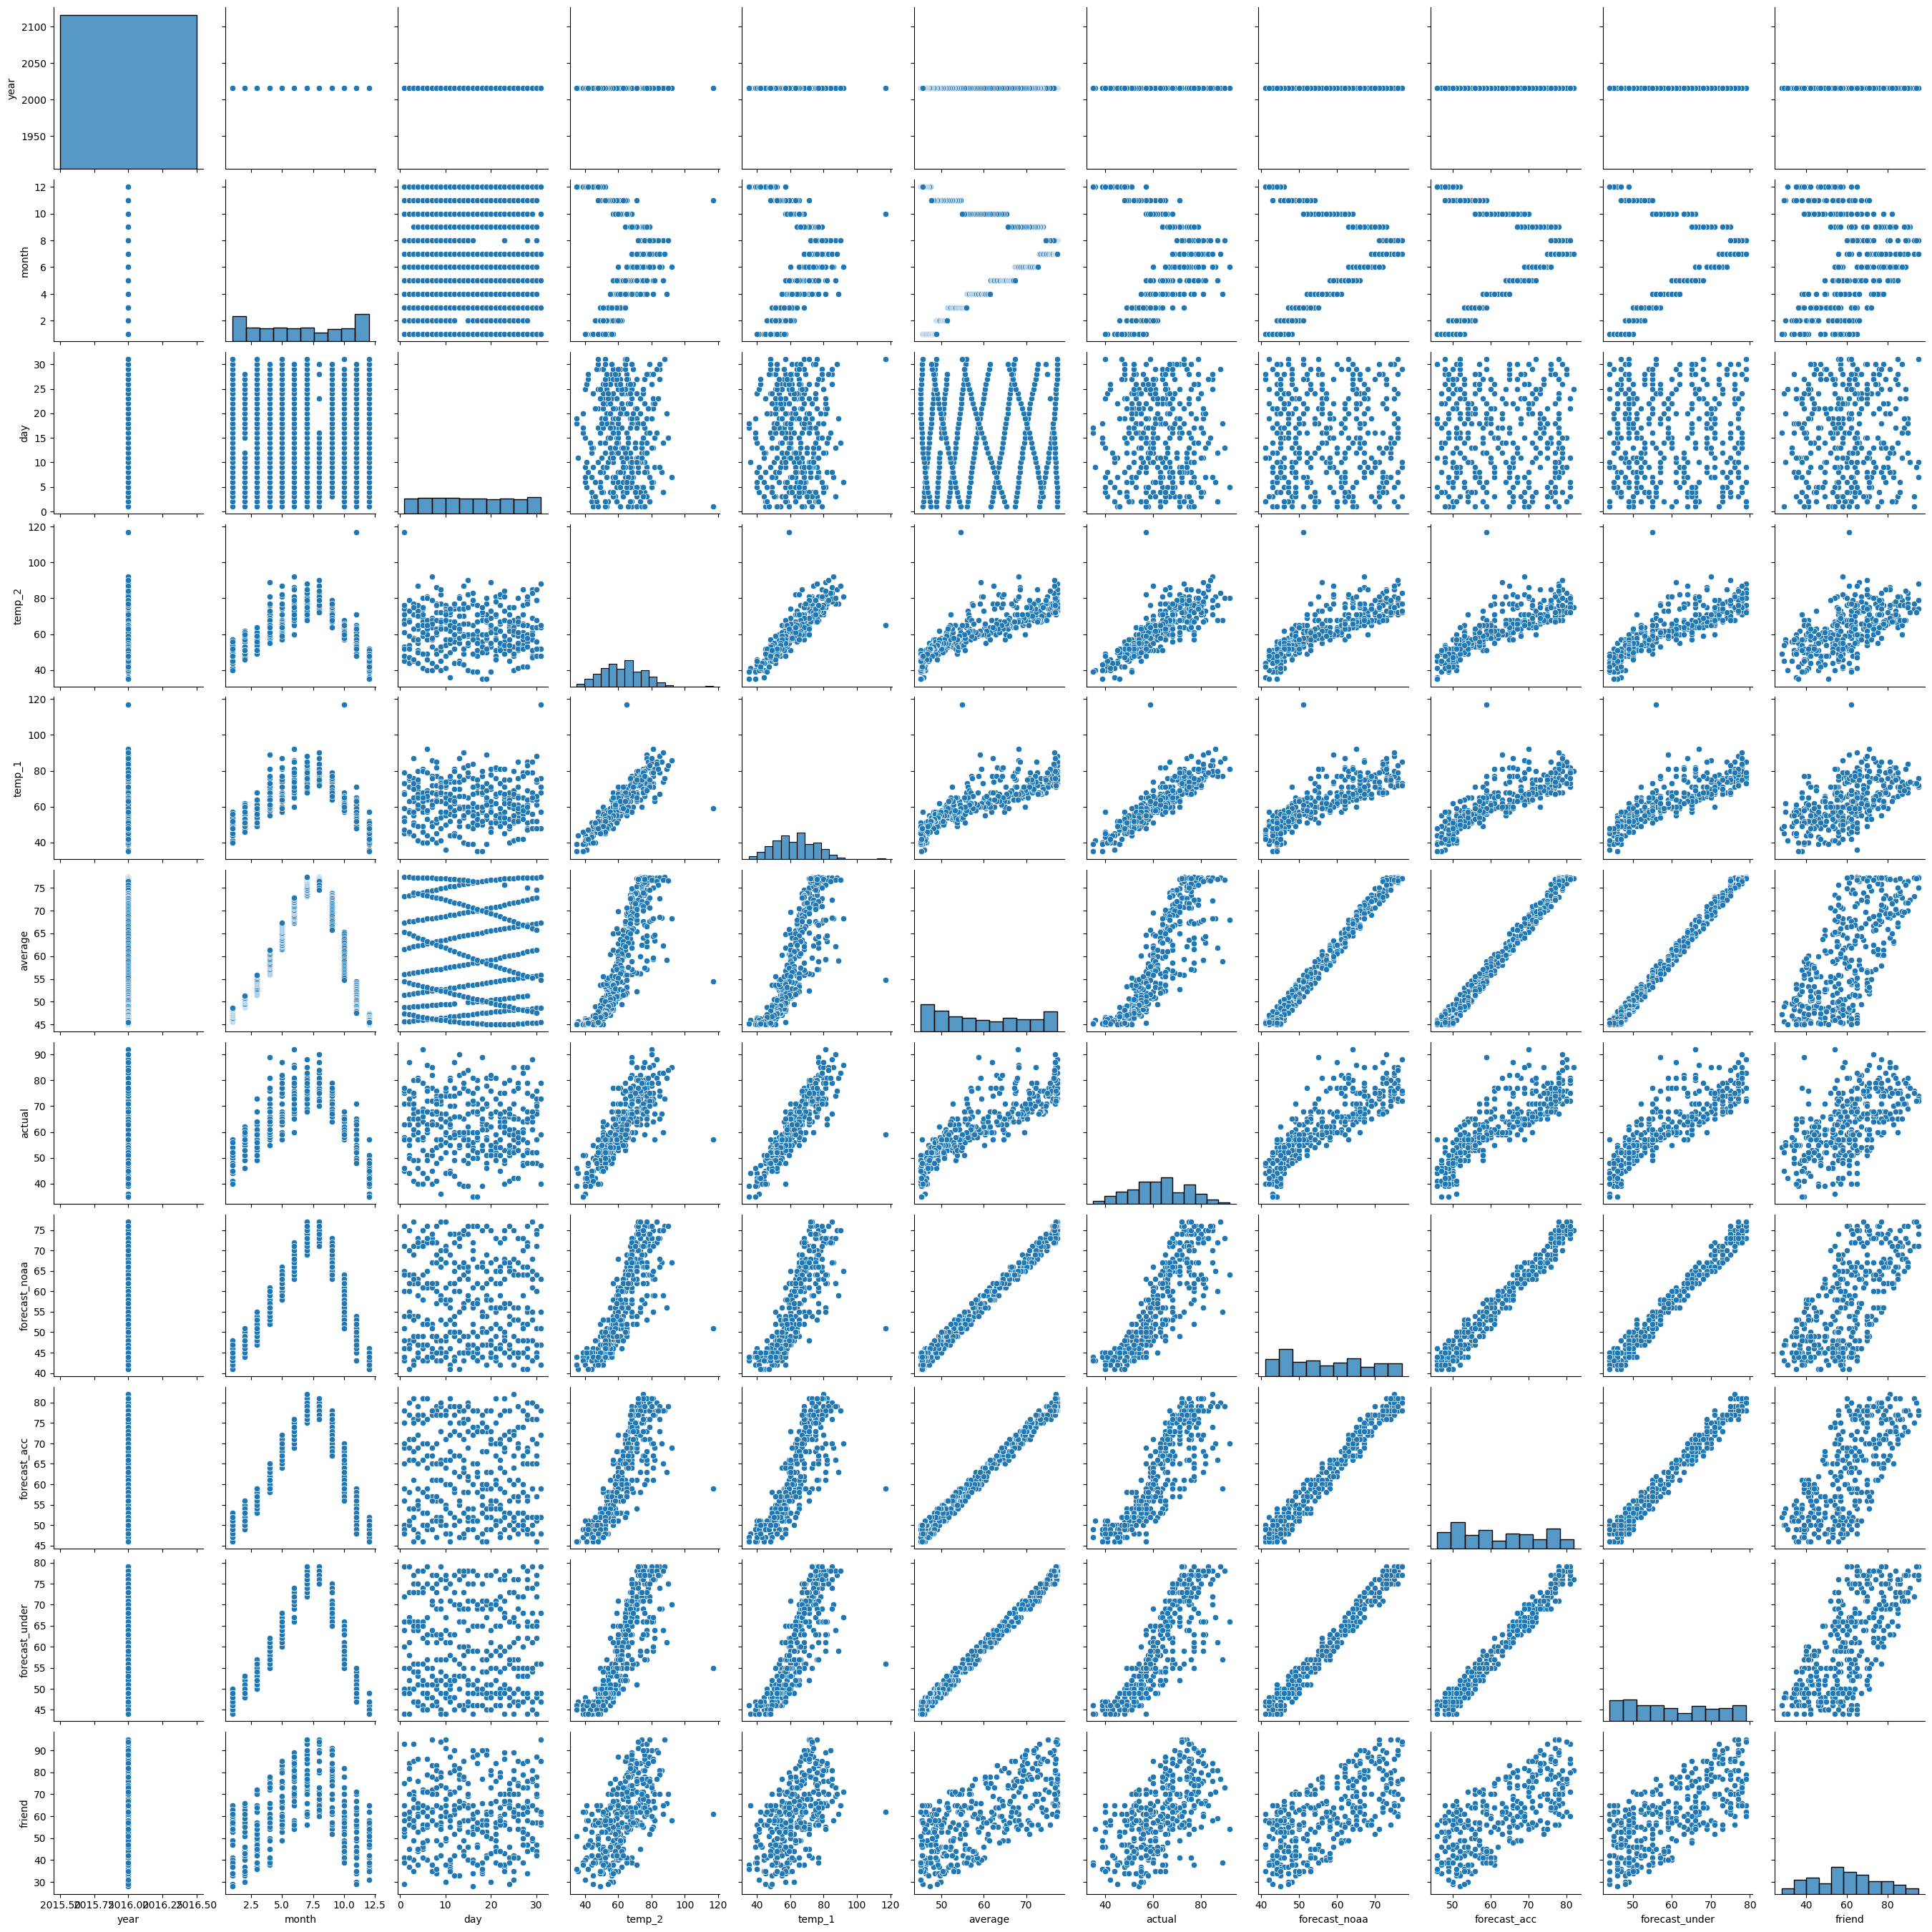

In [8]:
sns.pairplot(df)

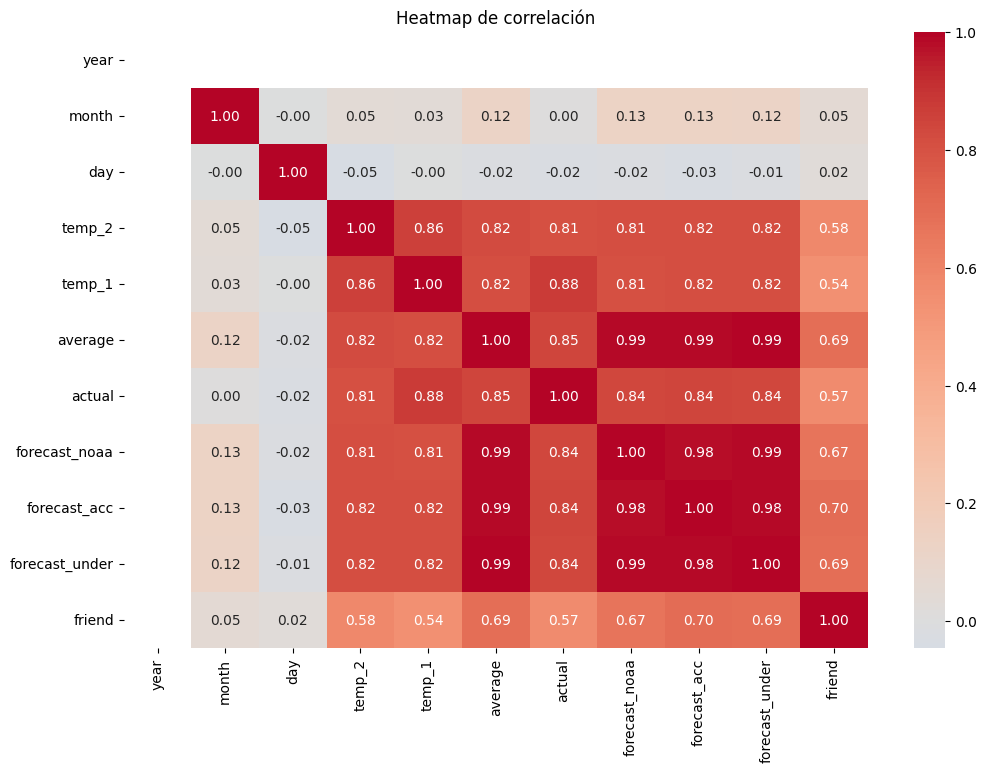

In [11]:
corr = df.corr(numeric_only = True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap de correlación")
plt.show()

### 3. Selecciona variables y divide en train y test

In [35]:
X = df.drop(["year", "month", "day","week", "actual", "forecast_acc", "forecast_under"], axis = 1)
y = df["actual"]

In [36]:
X

,temp_2,temp_1,average,forecast_noaa,friend
0,45,45,45.6,43,29
1,44,45,45.7,41,61
2,45,44,45.8,43,56
3,44,41,45.9,44,53
4,41,40,46.0,46,41
...,...,...,...,...,...
343,42,42,45.2,41,47
344,42,47,45.3,41,58
345,47,48,45.3,43,65
346,48,48,45.4,44,42


In [37]:
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.15, random_state=8)

### 4. Entrena el modelo


In [39]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=8)
tree_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
predictions = tree_reg.predict(X_test)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))

MAE: 5.21699019253367
MSE: 42.192143924035555
RMSE: 6.495548007984819
RMSE: 6.495548007984819


### 6. Representa el árbol de decisión

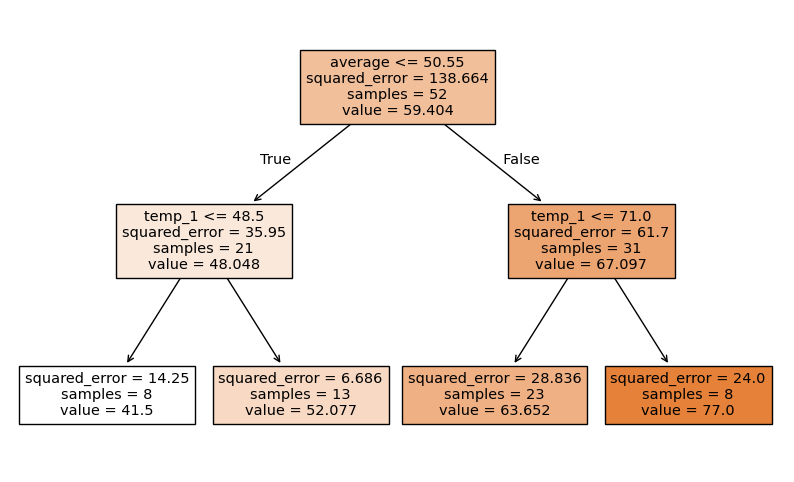

In [42]:
plt.figure(figsize=(10,6))
sklearn.tree.plot_tree(tree_reg,
               feature_names=X.columns,
               class_names=df["actual"],
               filled = True);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [43]:
tree_reg_2 = DecisionTreeRegressor(max_depth=3, random_state=8)
tree_reg_2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [44]:
predictions_2 = tree_reg.predict(X_test)

### 8. Vuelve a evaluar tu modelo

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions_2))

MAE: 5.21699019253367
MSE: 42.192143924035555
RMSE: 6.495548007984819
RMSE: 6.495548007984819


### 9. Vuelve a representar su árbol

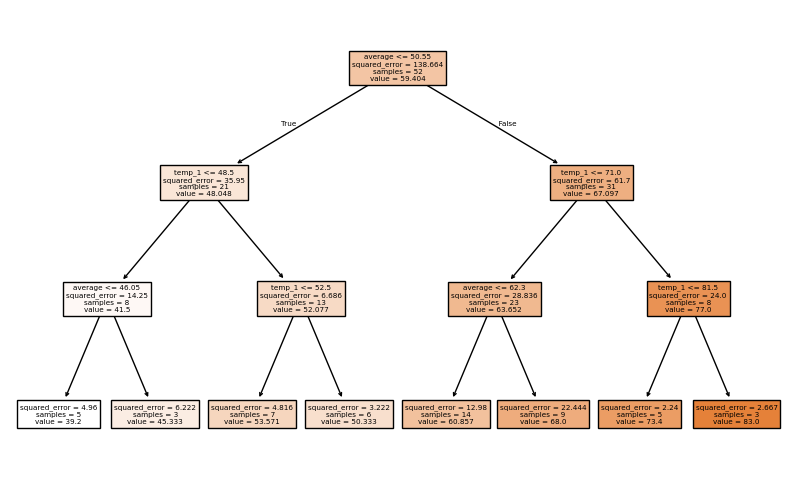

In [46]:
plt.figure(figsize=(10,6))
sklearn.tree.plot_tree(tree_reg_2,
               feature_names=X.columns,
               class_names=df["actual"],
               filled = True);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [53]:
depth_values = [2,3,4,5,6,7,8]
param_grid_tree_reg = {"max_depth": depth_values}
grid_tr = GridSearchCV(tree_reg, param_grid_tree_reg, cv=5, scoring="r2")
grid_tr.fit(X_train, y_train)

print("Mejor alpha Tree_reg:", grid_tr.best_params_["max_depth"])
print("Mejor R2 CV Tree_reg:", grid_tr.best_score_)

Mejor alpha Tree_reg: 3
Mejor R2 CV Tree_reg: 0.5861565870370881


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [55]:
importances = tree_reg.feature_importances_
print (X.columns)
print(importances)

Index(['temp_2', 'temp_1', 'average', 'forecast_noaa', 'friend'], dtype='object')
[0.        0.2618496 0.7381504 0.        0.       ]


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [81]:
df["celsius"] = (df["actual"] - 32)*5/9

In [82]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,mas_15,celsius
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,1,7.222222
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,1,6.666667
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,1,5.000000
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,4.444444
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,1,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,1,8.333333
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,1,8.888889
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,1,8.888889
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,1,13.888889


In [83]:
df["mas_15"] = (df["celsius"]>15).astype(int)
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,mas_15,celsius
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,7.222222
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,0,6.666667
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,0,5.000000
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,0,4.444444
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,0,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,0,8.333333
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,0,8.888889
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,0,8.888889
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0,13.888889


In [ ]:
df["celsius"].value_counts()

celsius
13.888889    16
15.555556    16
20.000000    16
18.333333    13
21.666667    12
12.777778    12
11.111111    11
19.444444    11
15.000000    11
17.777778    11
25.000000    10
10.555556    10
17.222222     9
23.888889     9
9.444444      9
24.444444     9
18.888889     9
11.666667     8
16.111111     8
12.222222     8
8.888889      8
22.777778     8
14.444444     7
13.333333     7
23.333333     7
26.111111     6
27.222222     6
16.666667     6
4.444444      6
20.555556     5
26.666667     5
22.222222     5
6.666667      4
29.444444     4
7.777778      4
7.222222      4
21.111111     4
10.000000     4
5.000000      3
27.777778     3
3.888889      3
5.555556      3
8.333333      2
1.666667      2
30.555556     2
25.555556     2
28.333333     2
31.666667     1
30.000000     1
33.333333     1
31.111111     1
28.888889     1
32.222222     1
6.111111      1
2.222222      1
Name: count, dtype: int64

In [85]:
X = df.drop(["year", "month", "day","week", "actual", "forecast_acc", "forecast_under","mas_15","celsius"], axis = 1)
y = df["mas_15"]

In [86]:
X

,temp_2,temp_1,average,forecast_noaa,friend
0,45,45,45.6,43,29
1,44,45,45.7,41,61
2,45,44,45.8,43,56
3,44,41,45.9,44,53
4,41,40,46.0,46,41
...,...,...,...,...,...
343,42,42,45.2,41,47
344,42,47,45.3,41,58
345,47,48,45.3,43,65
346,48,48,45.4,44,42


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.15, random_state=8)

In [89]:
depth_values = [2,3,4,5,6,7,8]
param_grid_tree_clas = {"max_depth": depth_values}
grid_trc = GridSearchCV(tree_clas, param_grid_tree_clas, cv=5, scoring="r2")
grid_trc.fit(X_train, y_train)

print("Mejor alpha Tree_reg:", grid_tr.best_params_["max_depth"])
print("Mejor R2 CV Tree_reg:", grid_tr.best_score_)

Mejor alpha Tree_reg: 3
Mejor R2 CV Tree_reg: 0.5861565870370881


In [90]:
tree_clas = DecisionTreeClassifier(max_depth=3, random_state=8)

In [91]:
tree_clas.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [92]:
predictions = tree_clas.predict(X_test)

In [93]:
predictions

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [94]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       120
           1       0.87      0.95      0.91       176

    accuracy                           0.88       296
   macro avg       0.89      0.87      0.87       296
weighted avg       0.88      0.88      0.88       296

